<a href="https://colab.research.google.com/github/AuraFrizzati/EDX-Statistical-Learning/blob/main/08_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 8: Tree-based Methods**

## **8.1 Tree-based Methods**
- Here we describe tree-based methods for regression and classification.
- These involve **stratifying** or **segmenting** the **predictor space** into a number of simple regions.
- Since the **set of splitting rules** used to segment the predictor space can be **summarized in a tree**, these types of approaches are known as decision-tree methods.
- The software package that first implemented the method for decision trees is called **CART (Classification And Regression Trees)**, created by Leo Breiman and Jerome Friedman.
- Trees tended to be used widely in previous years as the primary learning tools and now they are widely used as building blocks for some more modern learning tools.

### **Pros and Cons**
- Tree-based methods are simple and useful for interpretation.
- However they typically are not competitive with the best supervised learning approaches in terms of prediction accuracy.
- Hence we also discuss **bagging**, **random forests**, and **boosting**. These methods grow multiple trees which are then combined to yield a single consensus prediction (ensembling).
-Combining a large number of trees can often result in dramatic improvements in prediction accuracy, at the expense of some loss interpretation.
- Decision trees can be applied to both regression and classification problems.
- We first consider regression problems, and then move on to classification

### **Baseball salary data: how would you stratify it?**
Salary is color-coded from low (blue, green) to high (yellow,red):

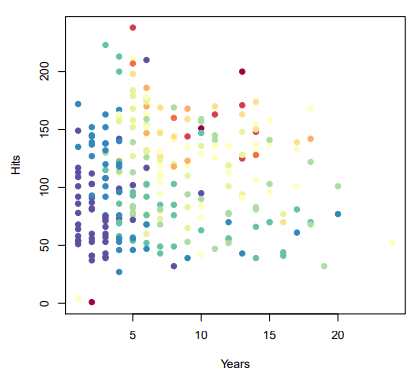

The decision tree for this data is:

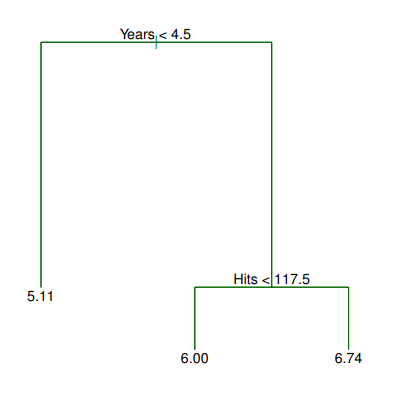

- For the Hitters data, a regression tree for predicting the log salary of a baseball player, based on the number of years that he has played in the major leagues and the number of hits that he
made in the previous year.
- At a given internal node, the label (of the form $X_j < t_k$) indicates the left-hand branch emanating from that split, and the right-hand branch corresponds to $X_j ≥ t_k$. For instance, the split at the top of the tree results in two large branches. The left-hand branch corresponds to $Years<4.5$, and the right-hand branch corresponds to $Years>=4.5$.
- The tree has two internal nodes and three terminal nodes, or leaves. The number in each leaf is the mean of the response for the observations that fall there.
- Overall, the tree stratifies or segments the players into three regions of predictor space: $R_1 ={X | Years< 4.5}$,   
$R_2 ={X | Years>=4.5, Hits<117.5}$,   
and $R_3 ={X | Years>=4.5, Hits>=117.5}$.

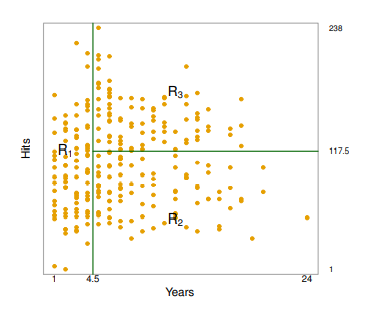



### **Terminology for Trees**
- In keeping with the tree analogy, the regions $R_1$, $R_2$, and $R_3$ are known as **terminal nodes**
- Decision trees are typically **drawn upside down**, in the sense that the leaves are at the bottom of the tree.
- The points along the tree where the predictor space is split are referred to as **internal nodes**
- In the hitters tree, the two internal nodes are indicated by the text $Years<4.5$ and $Hits<117.5$.

### **Interpretation of results**
- $Years$ is the most important factor in determining $Salary$, and players with less experience earn lower salaries than more experienced players.
- Given that a player is less experienced, the number of $Hits$ that he made in the previous year seems to play little role in his $Salary$.
- But among players who have been in the major leagues for five or more years, the number of $Hits$ made in the previous year does affect $Salary$, and players who made more $Hits$ last year tend to have higher salaries.
- Surely an over-simplification, but compared to a regression model, it is easy to display, interpret and explain



### **Details of the tree-building performance**
1. We divide the predictor space — that is, the set of possible values for $X_1, X_2, . . . , X_p$ — into $J$ distinct and non-overlapping regions, $R_1, R_2, . . . , R_J$.
2. For every observation that falls into the region $R_j$, we make the same prediction, which is simply the **mean of the response values** for the training observations in $R_j$.

- In theory, the regions could have any shape. However, we choose to divide the predictor space into **high-dimensional rectangles**, or **boxes**, for simplicity and for ease of interpretation of the resulting predictive model.
• The goal is to find boxes $R_1, . . . , R_J$ that minimize the RSS, given by
$$\sum_{j=1}^{J}\sum_{i∈R_j}(y_i-\hat{y}_{R_j})^2 $$
where $\hat{y}_{R_j}$ is the **mean response** for the training observations within the jth box.
- Unfortunately, it is computationally infeasible to consider every possible partition of the feature space into $J$ boxes.
- For this reason, we take a **top-down, greedy approximation approach** that is known as **recursive binary splitting**.
- The approach is **top-down** because **it begins at the top of the tree** and then successively splits the predictor space; each split is indicated via two new branches further down
on the tree.
- It is **greedy** because at each step of the tree-building process, **the best split is made at that particular step**, rather than looking ahead and picking a split that will lead to a better tree in some future step.
- We first select the predictor $X_j$ and the cutpoint $s$ such that splitting the predictor space into the regions ${X|X_j < s}$ and ${X|X_j ≥ s}$ leads to the **greatest possible reduction in RSS**.
- Next, we repeat the process, looking for the best predictor and best cutpoint in order to split the data further so as to minimize the RSS within each of the resulting regions.
- However, this time, instead of splitting the entire predictor space, we split one of the two previously identified regions. We now have three regions.
• Again, we look to split one of these three regions further,
so as to minimize the RSS. The process continues until a
stopping criterion is reached; for instance, we may continue
until no region contains more than five observations.


## **8.2 More details on Trees**
### **Predictions**
- We predict the response for a given test observation using the **mean** of the training observations in the region to which that test observation belongs.
- A five-region example of this approach is shown in the next figures.

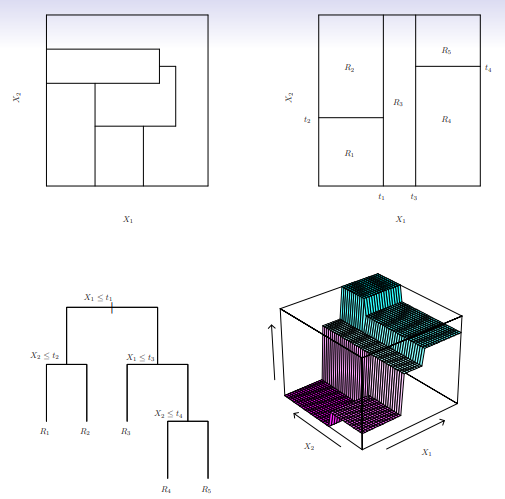

- Top Left: A partition of two-dimensional feature space that could *not* result from recursive binary splitting (the boxes cannot have been obtained by sequential data splitting) 
- Top Right: The output of recursive binary splitting on a two-dimensional example.
- Bottom Left: A tree corresponding to the partition in the top right panel.
- Bottom Right: A perspective plot of the prediction surface corresponding to that tree (it is a piecewise constant function)

### **Pruning a tree**
- The process described above may produce good predictions on the training set, but is likely to overfit the data, leading to poor test set performance. Why? If you have a tree that is so large that each observation has its own terminal node, it's going to have a training error of 0, but it is going to be adapted to that data very much and it is going to overfit.
- A smaller tree with fewer splits (that is, fewer regions $R_1, . . . , R_J$ ) might lead to lower variance and better interpretation at the cost of a little bias.
- One possible alternative to the process described above is to grow the tree only so long as the decrease in the RSS due to each split exceeds some (high) threshold.
- This strategy will result in smaller trees, but is too short-sighted: a seemingly worthless split early on in the tree might be followed by a very good split — that is, a split that leads to a large reduction in RSS later on.
- A better strategy is to **grow a very large tree** $T_0$, and then **prune it** back in order to obtain a subtree (this idea has been implemented in the CART software).
- **Cost complexity pruning** — also known as **weakest link pruning** — is used to do this
- We consider a sequence of trees indexed by a nonnegative **tuning parameter** $α$. For each value of $α$ there corresponds a subtree $T ⊂ T_0$ such that the expression below (the objective function or fit) is as small as possible:

$$\sum_{m=1}^{|T|}\sum_{i:x_i∈R_m}(y_i-\hat{y}_{R_m})^2 + \alpha|T|$$
- Here $|T|$ indicates the number of terminal nodes of the tree $T$, $R_m$ is the rectangle (i.e. the subset of predictor space) corresponding to the m-th terminal node, and $\hat{y}_{R_m}$ is the mean of the training observations in $R_m$.

### **Choosing the best subtree**
- The tuning parameter $α$ controls a trade-off between the subtree’s complexity and its fit to the training data. It counterbalances the size of the tree.
- We select an optimal value $\hat{α}$ using cross-validation.
- We then return to the full data set and obtain the subtree corresponding to $\hat{α}$.

### **Summary: tree algorithm**
1. Use recursive binary splitting to grow a large tree on the training data, stopping only when each terminal node has fewer than some minimum number of observations.
2. Apply cost complexity pruning to the large tree in order to obtain a sequence of best subtrees, as a function of $α$.
3. Use K-fold cross-validation to choose $α$. For each $k = 1, . . . , K$:   
  3.1 Repeat Steps 1 and 2 on the $\frac{K−1}{K}$
th fraction of the training data, excluding the kth fold.  
  3.2 Evaluate the mean squared prediction error on the data in the left-out kth fold, as a function of $α$.  
Average the results, and pick $α$ to minimize the average
error.
4. Return the subtree from Step 2 that corresponds to the chosen value of $α$.

### **Baseball example continued**
- First, we randomly divided the data set in half, yielding 132 observations in the training set and 131 observations in the test set.
- We then built a large regression tree on the training data and varied $α$ in in order to create subtrees with different numbers of terminal nodes.
- Finally, we performed six-fold cross-validation in order to estimate the cross-validated MSE of the trees as a function of $α$.


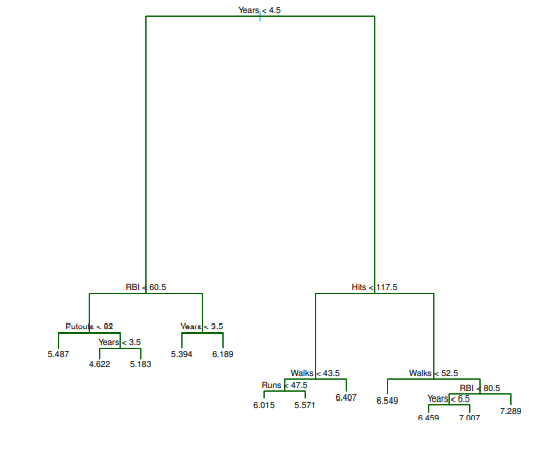



- Early splits that have caused a big decrease in the RSS are depicted by long arms. While the depth of the tree increases, the incremental improvements become smaller and smaller, and these are depicted as shorter arms.

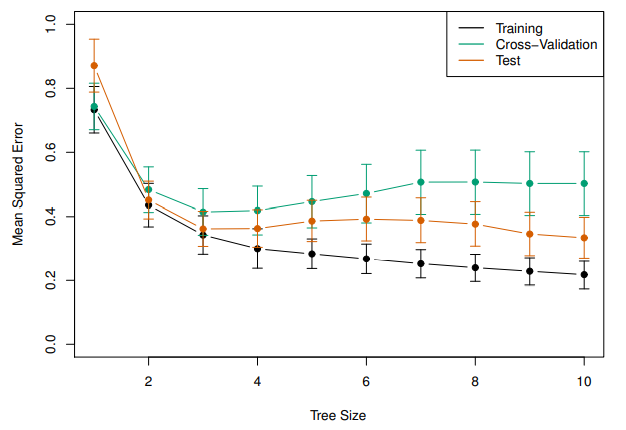

- From the picture above you can notice on the x-axis the Tree Size, which corresponds to the $\alpha$ parameter. If $\alpha = 0$ there is no penalty to tree size, so we get the largest tree we can fit. If $\alpha$ becomes bigger and bigger, it puts more and more penalty on the tree size, until eventually we are forced to the left end of the plot, with just one node (i.e. no splits at all).

### 8.2.R1
Imagine that you are doing cost complexity pruning as defined on page 18 of the notes. You fit two trees to the same data: $T_1$ is fit at $α=1$ and $T_2$ is fit at $α=2$. Which of the following is true?
- $T_1$ **will have at least as many nodes as** $T_2$
- $T_1$ will have at most as many nodes as $T_2$
- Not enough information is given in the problem to decide

A higher value of $alpha$ corresponds to a higher penalty on the complexity of the tree. This means that $T_1$ will have at least as many nodes as $T_2$.



## **8.3 Classification Trees**
- Very similar to a regression tree, except that it is used to **predict a qualitative response** rather than a quantitative one.
- For a classification tree, we predict that each observation belongs to the **most commonly occurring class** of training observations in the region to which it belongs.
-Just as in the regression setting, we use **recursive binary splitting** to grow a classification tree.
- In the classification setting, RSS cannot be used as a criterion for making the binary splits
- A natural alternative to RSS is the **classification error rate**. This is simply the fraction of the training observations in that region that do not belong to the most common class. Here, $\hat{p}_{mk}$ represents the proportion of training observations
in the $m$th region that are from the $k$th class:

$$ E = 1 - \mathop{max}_{k}(\hat{p}_{mk})$$
- However classification error is not sufficiently sensitive for tree-growing (using it does not lead to a very smooth tree-growing process), and in practice two other measures are preferable.

### **Gini Index and Deviance**
- The **Gini index** is defined by:
$$ G = \sum_{k=1}^{K} \hat{p}_{mk}(1-\hat{p}_{mk})$$
a measure of **total variance across the K classes** (binomial variance). The Gini index takes on a small value if all of the $\hat{p}_{mk}$’s are close to zero or one.
- For this reason the Gini index is referred to as a measure of **node purity** — a small value indicates that a node contains predominantly observations from a single class.
- An alternative to the Gini index is **cross-entropy** (or **deviance**), based on binomial or multinomial log likelihood. It is given by:
$$ D = - \sum_{k-1}^{K}\hat{p}_{mk}log(\hat{p}_{mk})$$
- It turns out that the Gini index and the cross-entropy are very similar numerically.

### **Example: heart data**
- These data contain a binary outcome Heart Disease (HD) for 303 patients who presented with chest pain.
- An outcome value of Yes indicates the presence of heart disease based on an angiographic test, while No means no heart disease.
- There are 13 predictors including Age, Sex, Chol (a cholesterol measurement), and other heart and lung function measurements.
- Cross-validation yields a tree with six terminal nodes.

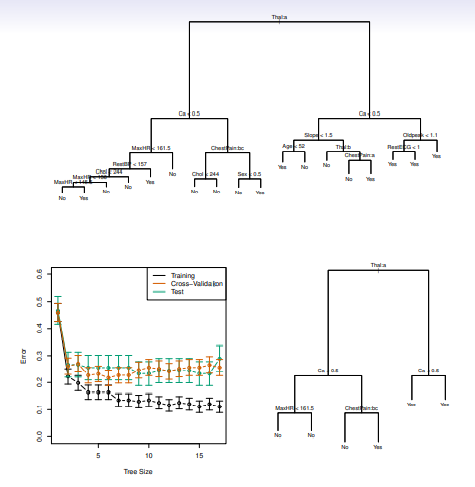

### **Trees vs Linear Models**
Top Row: True linear boundary;   
Bottom row: true non-linear
boundary.  
Left column: linear model;   
Right column: tree-based model

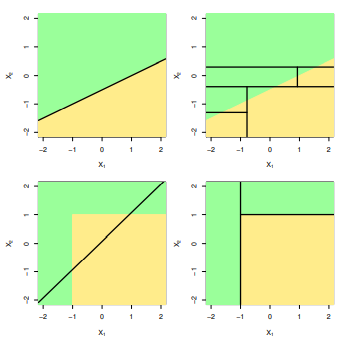

### **Advantages and Disadvantages of Trees**
▲ Trees are **very easy to explain** to people. In fact, they are even easier to explain than linear regression!  
▲ Some people believe that decision trees **more closely mirror human decision-making** than do the regression and classification approaches seen in previous chapters.  
▲ Trees can be **displayed graphically**, and are easily interpreted even by a non-expert (especially if they are small).  
▲ Trees can **easily handle qualitative predictors** without the need to create dummy variables.  
▼ Unfortunately, trees **generally do not have the same level of predictive accuracy** as some of the other regression and classification approaches seen in this book.


However, by aggregating many decision trees, the predictive performance of trees can be substantially improved. We introduce these concepts next.

### 8.3.R1
You have a bag of marbles with 64 red marbles and 36 blue marbles. What is the value of the Gini Index for that bag? Give your answer to the nearest hundredth:

$$ G = \sum_{k=1}^{K} \hat{p}_{mk}(1-\hat{p}_{mk})$$

$$ G = \frac{64}{100} * (1-\frac{64}{100}) + \frac{36}{100} * (1-\frac{36}{100}) $$
$$ G = 0.64*0.36 + 0.36*0.64 = 2*0.36*0.64 = 0.4608 = 0.46$$

### 8.3.R2
What is the value of the Cross-Entropy? Give your answer to the nearest hundredth (using log base e, as in R):

$$ D = - \sum_{k-1}^{K}\hat{p}_{mk}log(\hat{p}_{mk})$$

$$ D = - [0.64*log(0.64)+0.36*log(0.36)] = 0.65$$

### **8.4 Bagging and Random Forests**

### **Bagging**
- **Bootstrap aggregation**, or **bagging**, is a general-purpose procedure for reducing the variance of a statistical learning method; we introduce it here because it is particularly
useful and frequently used in the context of decision trees.
- Recall that given a set of n independent observations $Z_1, . . . , Z_n$, each with variance $σ^2$, the variance of the mean $\overline{Z}$ of the observations is given by $\frac{σ^2}{n}$.
- In other words, **averaging a set of observations reduces variance**. Of course, this is not practical because we generally do not have access to multiple training sets.
- Instead, we can bootstrap, by taking repeated samples from the (single) training data set.
- In this approach we generate $B$ different bootstrapped training data sets. We then train our method on the $b$th bootstrapped training set in order to get $\hat{f}^{∗b}(x)$, the prediction at a point $x$. We then perform **bagging**, i.e. we **average all the predictions** to obtain:

$$\hat{f}_{bag}(x) = \frac{1}{B}\sum_{b=1}^{B}\hat{f}^{∗b}(x) $$

- The above prescription applied to **regression trees**
- For **classification trees**: for each test observation, we record the class predicted by each of the $B$ trees, and take a **majority vote**: the overall prediction is the most commonly occurring class among the $B$ predictions.

### **Bagging the heart data**

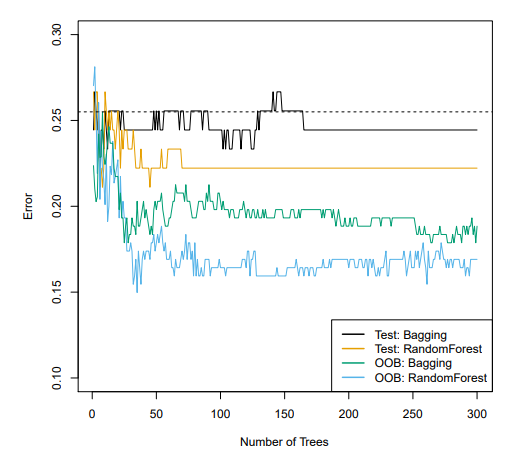


Bagging and random forest results for the Heart data:
- The test error (black and orange) is shown as a function of $B$, the **number of bootstrapped training sets** used. 
- Random forests were applied with $m =
\sqrt{p}$.
- The dashed line indicates the test error resulting from a single classification tree. With bagging the prediction does not improve a lot.
- The green and blue traces show the OOB (Out Of Bag) error, which in this case is considerably lower

### **Out-of-Bag Error Estimation**
- It turns out that there is a very straightforward way to estimate the test error of a bagged model.
- Recall that the key to bagging is that trees are repeatedly fit to bootstrapped subsets of the observations. One can
show that on average, each bagged tree makes use of around two-thirds of the observations.
- The remaining one-third of the observations not used to fit a given bagged tree are referred to as the **out-of-bag (OOB) observations**.
- We can predict the response for the $i$th observation using each of the trees in which that observation was OOB. This
will yield around $\frac{B}{3}$ predictions for the $i$th observation,
which we average.
- This estimate is essentially the **LOO (Left One Out) cross-validation error for bagging**, if B is large.

### **Random Forests**
- **Random forests** provide an improvement over bagged trees by way of a small tweak that **decorrelates the trees**. This **reduces the variance** when we average the trees.
- As in bagging, we build a number of decision trees on bootstrapped training samples.
- But when building these decision trees, each time a **split** in a tree is considered, a **random selection of $m$ predictors** is chosen as split candidates from the full set of $p$ predictors. The split is allowed to use only one of those $m$ predictors.
- A fresh selection of $m$ predictors is taken at each split, and typically we choose $m ≈ \sqrt{p}$ — that is, the number of predictors considered at each split is approximately equal to the square root of the total number of predictors (4 out of the 13 for the Heart data).

### **Example: gene expression data**
- We applied random forests to a high-dimensional biological data set consisting of expression measurements of 4,718 genes measured on tissue samples from 349 patients.
- There are around 20,000 genes in humans, and individual genes have different levels of activity, or expression, in particular cells, tissues, and biological conditions.
- Each of the patient samples has a qualitative label with 15 different levels: either normal or one of 14 different types of cancer.
- We use random forests to predict cancer type based on the 500 genes that have the largest variance in the training set.
- We randomly divided the observations into a training and a test set, and applied random forests to the training set for three different values of the number of splitting variables $m$.

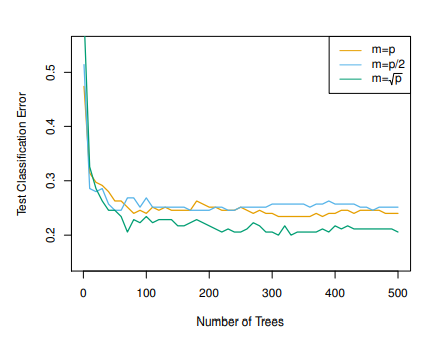

- Results from random forests for the fifteen-class gene expression data set with $p$ = 500 predictors.
- The test error is displayed as a function of the number of trees. Each colored line corresponds to a different value of m, the number of predictors available for splitting at each interior tree node.
- Random forests ($m < p$) lead to a slight improvement over bagging ($m = p$). A single classification tree has an error rate of 45.7%.

### 8.4.R1

Suppose we produce ten bootstrap samples from a data set containing red and green classes. We then apply a classification tree to each bootstrap sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X): $0.1,0.15,0.2,0.2,0.55,0.6,0.6,0.65,0.7$, and $0.75$  
There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in the notes. The second approach is to classify based on the average probability.

What is the final classification under the majority vote method?:
**Red** (6/10)

### 8.4.R2
What is the final classification under the average probability method?:

**Green** (average = 0.45)


## **8.5 Boosting**
- Like bagging, **boosting** is a general approach that can be applied to many statistical learning methods for regression or classification. We only discuss boosting for decision trees.
- Recall that bagging involves creating multiple copies of the original training data set using the bootstrap, fitting a
separate decision tree to each copy, and then combining all of the trees in order to create a single predictive model.
- Notably, each tree is built on a bootstrap data set, independent of the other trees.
- Boosting works in a similar way, except that the **trees are grown sequentially**: each tree is grown using information from previously grown trees.

### **Boosting algorithm for regression trees**
1. Set $\hat{f}(x) = 0$ and $r_i = y_i$ for all $i$ in the training set ($r$ stands for **residuals**, at the very step they are the observations).
2. For $b = 1, 2, . . . , B$, repeat:  
  2.1 Fit a tree $\hat{f}^b$ with $d$ splits ($d + 1$ terminal nodes) to the
training data $(X, r)$  
  2.2 Update $\hat{f}$ by adding in a shrunken version of the new tree:  
  $$\hat{f}(x) ← \hat{f}(x) + \lambda\hat{f}^b(x)$$
  2.3 Update the residuals:
  $$r_i ← r_i + \lambda\hat{f}^b(x_i)$$
3. Output the boosted model:
$$\hat{f}(x)=\sum_{b=1}^{B}\lambda\hat{f}^b(x) $$ 

- The trees built in this way are not independent as in random forests, because each tree is grown from the residuals left over from the previous collection of trees.

### **What is the idea behind this procedure?**
- Unlike fitting a single large decision tree to the data, which amounts to fitting the data hard and potentially overfitting, the boosting approach instead **learns slowly**.
- Given the current model, we **fit a decision tree to the residuals from the model**. We then add this new decision
tree into the fitted function in order to **update the residuals**.
- Each of these **trees can be rather small**, with just a few terminal nodes, determined by the parameter $d$ in the algorithm.
- By fitting small trees to the residuals, we slowly improve $\hat{f}$ in areas where it does not perform well. 
- The **shrinkage parameter** $λ$ slows the process down even further, allowing more and different shaped trees to attack the residuals.

### **Boosting for classification**
- Boosting for classification is similar in spirit to boosting for regression, but is a bit more complex. We will not go into
detail here, nor do we in the text book.
- Students can learn about the details in Elements of Statistical Learning, chapter 10.
- The R package `gbm` (gradient boosted models) handles a variety of regression and classification problems.

### **Gene expression data continued**

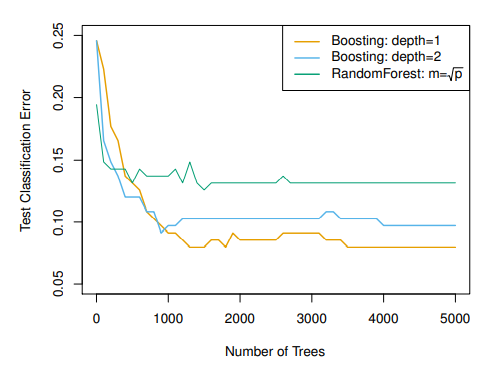

- Results from performing boosting and random forests on the fifteen-class gene expression data set in order to predict
cancer versus normal.
- The test error is displayed as a function of the number of trees. For the two boosted models, $λ = 0.01$. Depth-1 trees slightly outperform depth-2 trees, and both outperform the random forest, although the standard errors are around
$0.02$, making none of these differences significant.
- The test error rate for a single tree is $24$%.

### **Tuning parameters for boosting**
1. The **number of trees** $B$. Unlike bagging and random forests, boosting can **overfit** if B is too large, although this overfitting tends to occur slowly if at all. We use **cross-validation** to select $B$.
2. The **shrinkage parameter** $λ$, a small positive number. This **controls the rate at which boosting learns**. Typical values are 0.01 or 0.001, and the right choice can depend on the problem. Very small $λ$ can require using a very large value of $B$ in order to achieve good performance.
3. The **number of splits** $d$ in each tree, which controls the complexity of the boosted ensemble. Often $d = 1$ works
well, in which case each tree is a **stump**, consisting of a **single split** and resulting in an **additive model**. More generally $d$ is the **interaction depth**, and controls the
interaction order of the boosted model, since $d$ splits can involve at most $d$ variables.

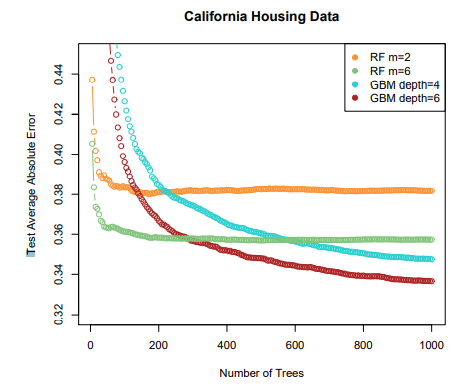


- GBM = Gradient Boosting Machine

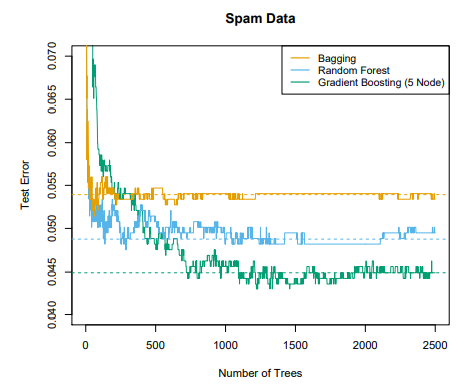


### **Variable importance measure**
- When dealing with tree models, there is no single parameter (e.g. coefficient with a standard error) you can refer to, because trees use variables in multiple places in their splits
- For **bagged/RF/boosted regression trees**, we record the **total amount that the RSS is decreased due to splits over a given predictor , averaged over all $B$ trees**. A large value indicates an important predictor.
- Similarly, for **bagged/RF/boosted classification trees**, we **add up the total amount that the Gini index is decreased by splits over a given predictor, averaged over all $B$ trees**.



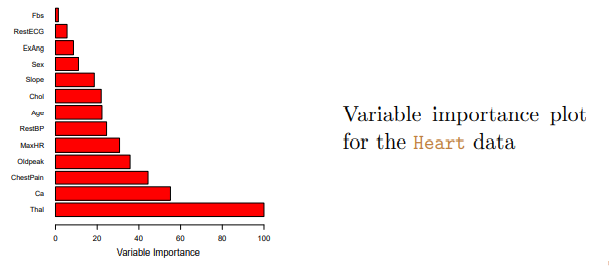

### **Summary**
- Decision trees are simple and interpretable models for regression and classification
- However they are often not competitive with other methods in terms of prediction accuracy
- Bagging, random forests and boosting are good methods for improving the prediction accuracy of trees. They work
by growing many trees on the training data and then combining the predictions of the resulting ensemble of trees.
- The latter two methods— random forests and boosting— are among the state-of-the-art methods for supervised
learning. However, their results can be difficult to interpret.

### 8.5.R1
In order to perform Boosting, we need to select 3 parameters: number of samples $B$, tree depth $d$, and step size $λ$.

How many parameters do we need to select in order to perform Random Forests?:
2: number of samples ($B$) and numper of predictors ($m$) to be sampled at each split

## **Chapter 8 Final Quiz**##
### **8.Q1**
The tree building algorithm given on pg 13 is described as a Greedy Algorithm. Which of the following is also an example of a Greedy Algorithm?:
- The Lasso
- Support Vector Machines
- The Bootstrap
- **Forward Stepwise Selection**  
Forward Stepwise Selection is a Greedy Algorithm because at each step it selects the variable that improves the current model the most. There is no guarantee that the final result will be optimal.

### **8.Q2**
Examine the plot on pg 23. 

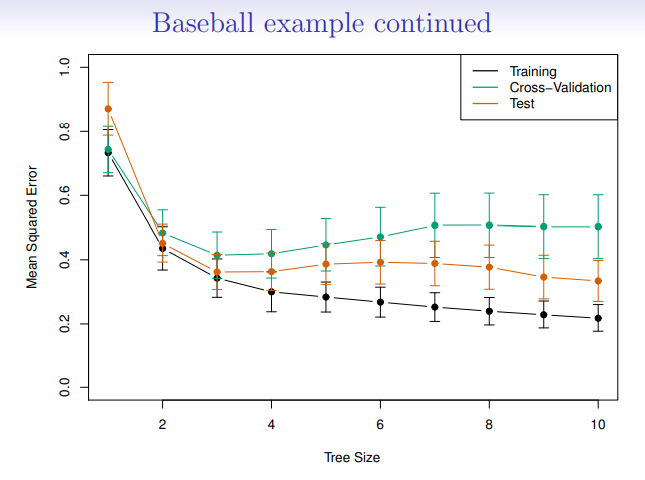

Assume that we wanted to select a model using the one-standard-error rule on the Cross-Validated error. What tree size would end up being selected?:
- 1
- **2**
- 3
- 10

Explanation: Cross-Validated error is minimized at tree size 3. The error for Tree size 2 is within one standard error of the minimum, but the error for tree size 1 is not. Thus, the one-standard-error rule selects tree size 2.


### **8.Q3**
Suppose I have two qualitative predictor variables, each with three levels, and a quantitative response. I am considering fitting either a tree or an additive model. For the additive model, I will use a piecewise-constant function for each variable, with a separate constant for each level. Which model is capable of fitting a richer class of functions:
- **Tree**
- Additive Model
- They are equivalent

**Explanation**: 
Although each split of the **tree** makes two partitions, it **can fit interactions**, while the additive model cannot. With enough splits the tree can fit a full 3x3 regression surface.